<a href="https://colab.research.google.com/github/JHWannabe/self-taught_machine_learning_code/blob/main/6%EC%9E%A5_%ED%98%BC%EC%9E%90_%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%2B%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##6.1 군집 알고리즘

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-12-06 16:01:58--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-12-06 16:01:58--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-12-06 16:01:59--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... c

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fruits = np.load('fruits_300.npy')
print(fruits.shape)

(300, 100, 100)


In [4]:
print(fruits.shape)

(300, 100, 100)


In [5]:
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


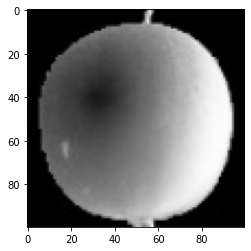

In [6]:
plt.imshow(fruits[0], cmap='gray')

##6.2 k-평균

In [7]:
fruits_2d = fruits.reshape(-1, 100*100)

In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [9]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [10]:
print(np.unique(km.labels_, return_counts= True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [11]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio = 1) :
  n=len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze =False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

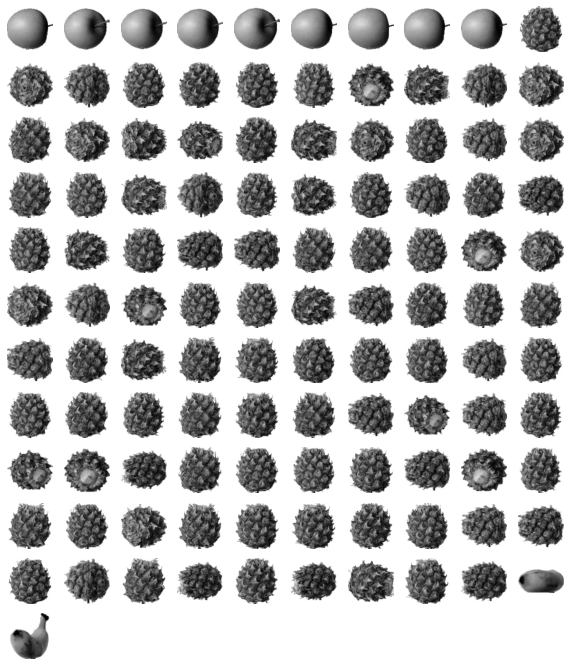

In [12]:
draw_fruits(fruits[km.labels_==0])

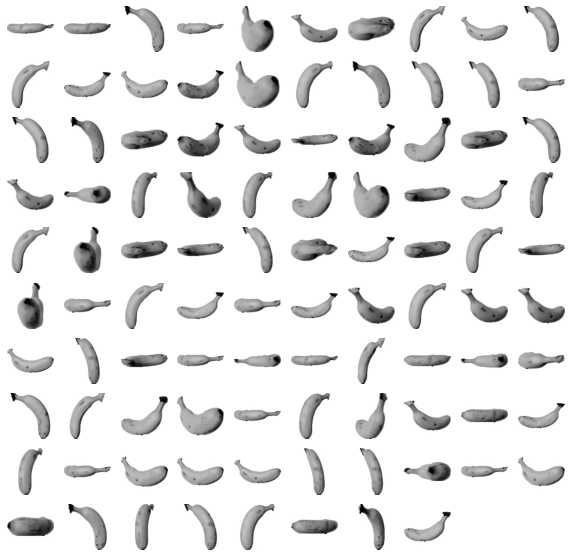

In [13]:
draw_fruits(fruits[km.labels_==1])

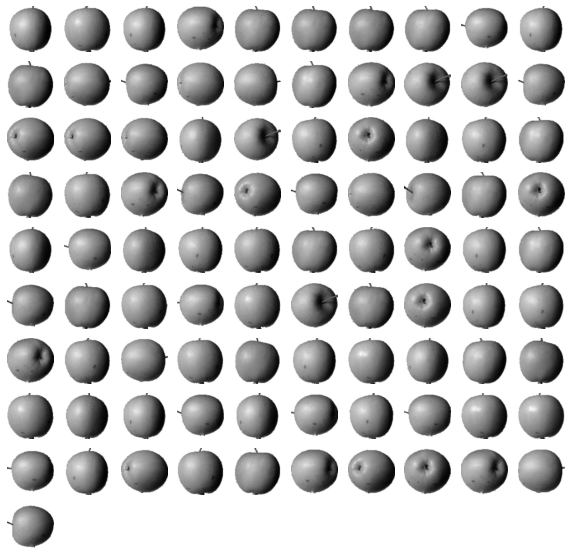

In [14]:
draw_fruits(fruits[km.labels_==2])

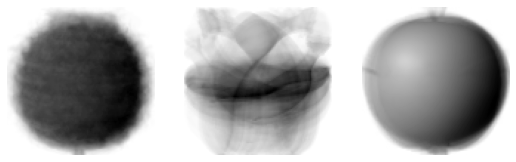

In [15]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100), ratio = 3)

In [16]:
km.transform(fruits_2d[100:101])

array([[3393.8136117 , 8837.37750892, 5267.70439881]])

In [17]:
km.predict(fruits_2d[100:101])

array([0], dtype=int32)

In [18]:
fruits_2d[100:101].shape

(1, 10000)

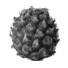

In [19]:
draw_fruits(fruits[100:101])

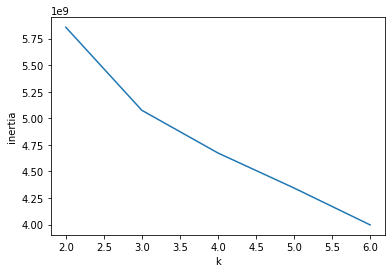

In [20]:
inertia = []
for k in range(2,7):
  km = KMeans(n_clusters=k, random_state = 42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

##6.3 주성분 분석

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [22]:
pca.components_.shape

(50, 10000)

In [23]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio = 1) :
  n=len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze =False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

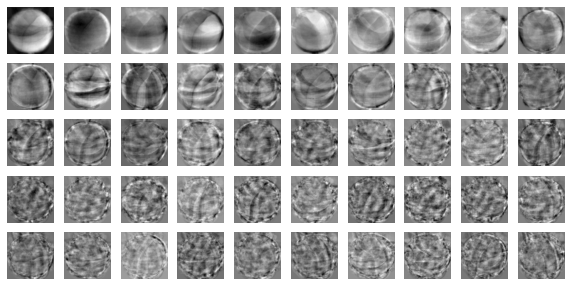

In [24]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [25]:
fruits_2d.shape

(300, 10000)

In [26]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [27]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


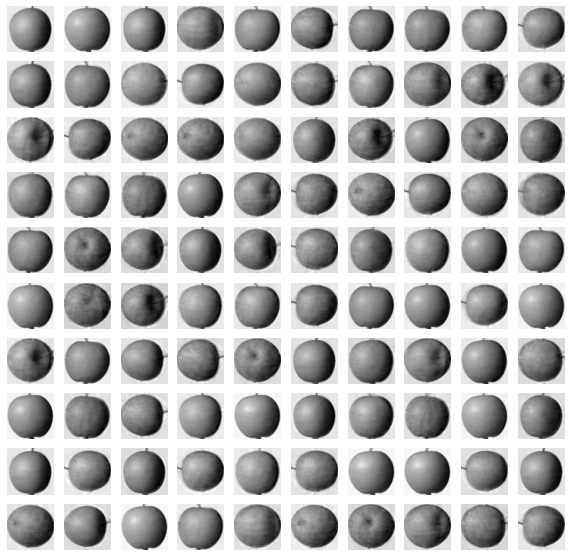

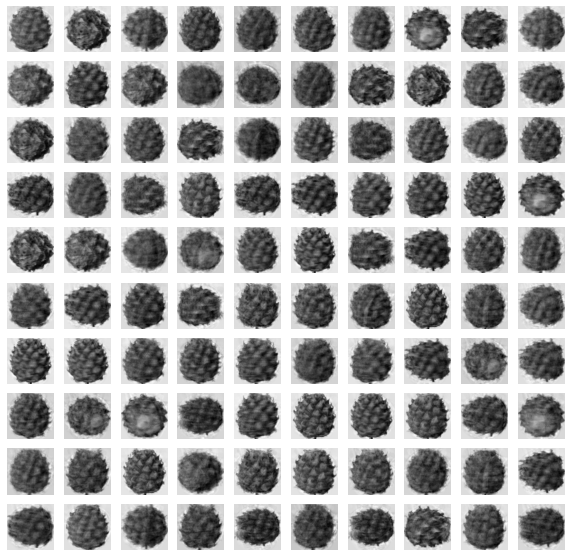

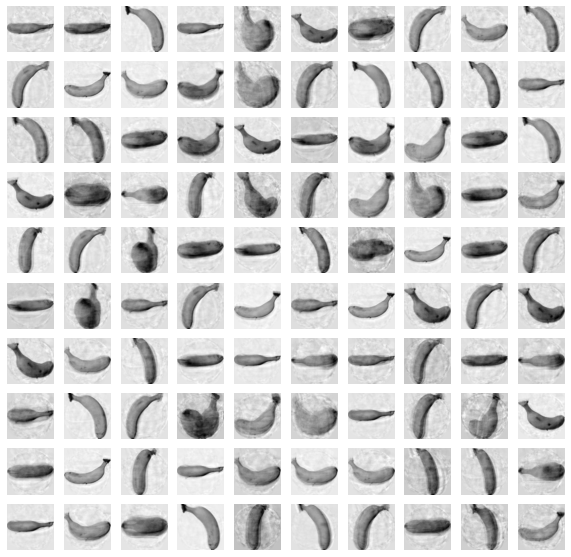

In [28]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [29]:
print(np.sum(pca.explained_variance_ratio_))

0.9215649906765299


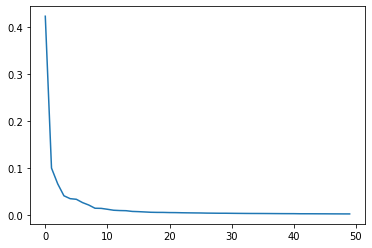

In [30]:
plt.plot(pca.explained_variance_ratio_)

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [32]:
target = np.array([0]*100 + [1]*100 +[2]*100)

In [33]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.8386863708496093


In [34]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.043030071258544925


In [35]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [36]:
pca.n_components_

2

In [37]:
fruits_pca = pca.transform(fruits_2d)

In [38]:
scores = cross_validate(lr, fruits_pca, target)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [39]:
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.046344566345214847


In [40]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts =True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


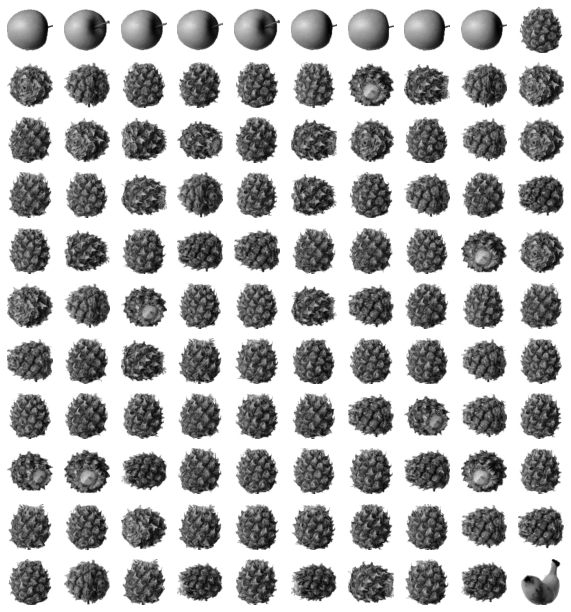

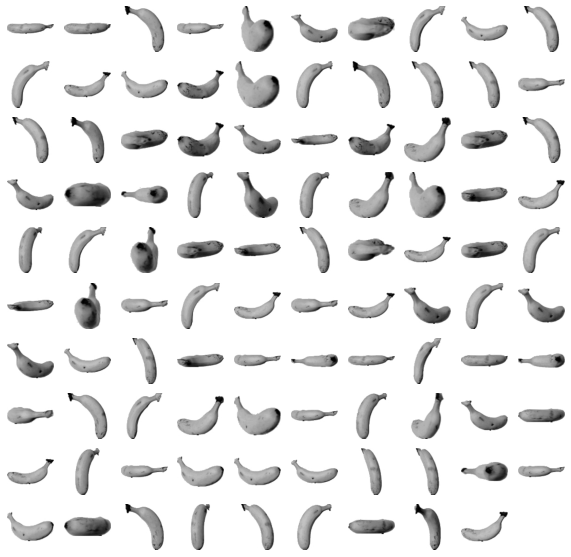

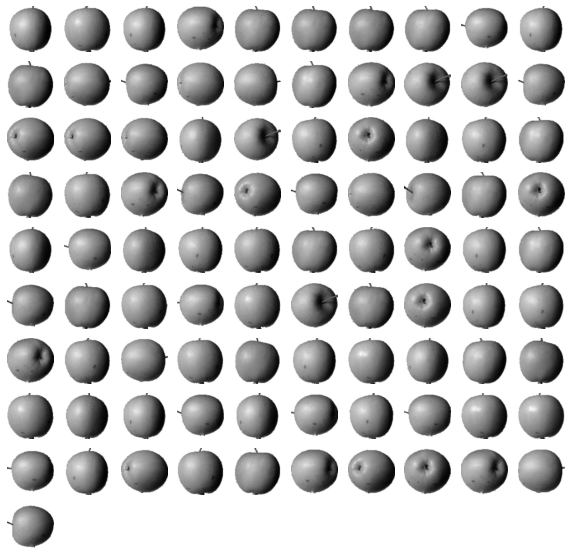

In [41]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

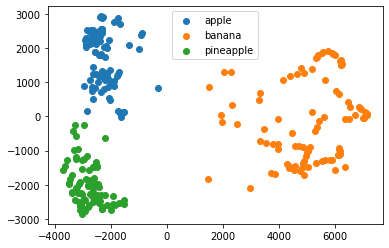

In [42]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()